In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# create a set of random lats and longs combos

lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#add the lats and longs to a list

coordinates = list (lat_lngs)

In [5]:
#use the print() finction to display the lat and long combos

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

61.977799844992774 -105.13714130160267
-9.94914065561612 -30.476596284040426
24.72801724691361 -43.73416030142181
-8.964411983764194 48.09233113799485
-8.312773336860161 -4.7881057166580945
-44.183550114027696 42.47074605787094
12.436935170192342 -141.51507510875385
-40.30140942530717 -38.09857242674778
-75.94695962000729 61.433522298358156
41.94655640807434 -166.84730825241368
-77.5366079178786 -4.678304549749441
-32.69974872992099 24.451960174707864
-58.2735732197923 -6.766431123268717
-84.0774364801169 -49.99838083098433
-17.458849805754653 -67.56476455054238
74.97477572556639 114.01852308136239
39.140172675431415 -70.84663918029626
-32.08173943153869 119.20729905647153
33.94897083877173 76.49564749743894
-24.30513587169034 85.36313588690592
-46.01180834210824 -151.8392880662382
-66.0594160849534 -14.318542583126714
-3.817218043966548 130.50761764286364
-47.06738328488838 -177.11905931594248
85.51241378268787 72.4362164164944
-52.132796882604445 -40.01841383529808
-40.70086100122000

In [6]:
#use the citipy module to determine city based on lat and long

from citipy import citipy

ModuleNotFoundError: No module named 'citipy'

In [ ]:
#create a list for holding the cities

cities = []

#id nearest city for each long lat combo

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then add to the cities list
    
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count

len(cities)

599

In [ ]:
#PREP FROM API PRACTICE

#import the requests library

import requests

#import API key

from config import weather_api_key

In [ ]:
#PREP FROM API PRACTICE

#starting URl for Weather Map API Call
#put in api key to run
#6.2.3 - Make an API Call

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b2b847af054763dea962ee0515548f"
print(url)


http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=88b2b847af054763dea962ee0515548f


In [ ]:
#PREP FROM API PRACTICE

import time
from datetime import datetime

In [ ]:
# create empty list to hold the weather data

city_data = []

# print the beginning of the logging

print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters

record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [ ]:
# LOOP through all cities in list

#for i in range(len(cities)):
    
#    # group cities in sets of 50 for logging purposes
    
#    if (i % 50 == 0 and i >=50):
#        set_count += 1
#        record_count = 1
#        time.sleep (60)
        
#    # create endpoint URL with each city
    
#    city_url = url + "&q=" + cities[i]
#    #print(city_url)

In [ ]:
#enumerate syntax:
# for i, item in enumerate(list):

# LOOP through all the cities in the list

for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes
    
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # create endpoint URL with each city
    
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log the URL, record, and set numbers and the city
    
    print (f"Processing record {record_count} of Set {set_count} | {city}")
    
    # add 1 to the record count
    
    record_count += 1
    
    # Run an API request for each of the cities
    
    try:
        
        # parrse the JSON and retrieve the data
        
        city_weather = requests.get(city_url).json()
        
        # parse out the needed data
        
        city_lat = city_weather ["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # convert the date to ISO standard
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # append the city info into city_data_list
        
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # if an error is experienced, skip the city.
    
    except:
        print ("City not found. Skipping...")
        pass
    
    # indicate that data loading is complete.
    
    print("-----------------------------")
    print("Data Retrieval Complete      ")
    print("-----------------------------")

Processing record 1 of Set 1 | shelburne
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 2 of Set 1 | tautira
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 3 of Set 1 | barentsburg
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 4 of Set 1 | hienghene
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 5 of Set 1 | ushuaia
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 6 of Set 1 | fortuna
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 7 of Set 1 | chokurdakh
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 8 of Set 1 | umm lajj
------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 13 of Set 2 | mar del plata
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 14 of Set 2 | bengkulu
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 15 of Set 2 | novobiryusinskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 16 of Set 2 | vostok
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 17 of Set 2 | amnat charoen
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 18 of Set 2 | rantauprapat
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 19 of Set 2 | xining
-----------------------------
Data Retrieval Complete      
-----

City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 25 of Set 3 | cherskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 26 of Set 3 | punta alta
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 27 of Set 3 | mount isa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 28 of Set 3 | port blair
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 29 of Set 3 | saint-francois
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 30 of Set 3 | usinsk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 31 of Set 3 | udachnyy
-----------------------------
Data Retrieval C

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 38 of Set 4 | agadez
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 39 of Set 4 | vyritsa
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 40 of Set 4 | vila velha
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 41 of Set 4 | provideniya
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 42 of Set 4 | airai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 43 of Set 4 | nizhneyansk
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 44 of Set 4 | te anau
-----------------------------
Data Retrieval Complete 

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 49 of Set 5 | wulanhaote
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 50 of Set 5 | mumford
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 1 of Set 6 | lima
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 2 of Set 6 | viligili
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 3 of Set 6 | gardez
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 4 of Set 6 | lodja
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 5 of Set 6 | bara
-----------------------------
Data Retrieval

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 11 of Set 7 | opmeer
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 12 of Set 7 | calbuco
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 13 of Set 7 | cockburn town
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 14 of Set 7 | oktyabrskiy
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 15 of Set 7 | mareeba
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 16 of Set 7 | avila
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 17 of Set 7 | oga
-----------------------------
Data Retrieval Complete      
---------------------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 23 of Set 8 | innisfail
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 24 of Set 8 | itoman
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 25 of Set 8 | rolim de moura
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 26 of Set 8 | poum
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 27 of Set 8 | soyo
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 28 of Set 8 | matagami
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 29 of Set 8 | carutapera
-----------------------------
Data Retrieval Complete   

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 36 of Set 9 | tres arroyos
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 37 of Set 9 | bilibino
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 38 of Set 9 | the valley
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 39 of Set 9 | sorvag
City not found. Skipping...
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 40 of Set 9 | terney
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 41 of Set 9 | shevchenkove
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 42 of Set 9 | corvallis
-----------------------------
Data Retrieval Com

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 48 of Set 10 | kirakira
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 49 of Set 10 | zhuhai
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 50 of Set 10 | guanica
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 1 of Set 11 | tuatapere
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 2 of Set 11 | acajutla
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 3 of Set 11 | terrace bay
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 4 of Set 11 | solvychegodsk
-----------------------------
Data Retrieval Complete      
--------------

-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 10 of Set 12 | razole
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 11 of Set 12 | belmopan
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 12 of Set 12 | khuzhir
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 13 of Set 12 | san rafael del sur
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 14 of Set 12 | tabuk
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 15 of Set 12 | porto torres
-----------------------------
Data Retrieval Complete      
-----------------------------
Processing record 16 of Set 12 | mirpur mathelo
-----------------------------
Data Retrieval Complete      
--

In [ ]:
# convert the array of dictionaries to a pandas dataframe

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Shelburne,44.0787,-80.2041,72.75,90,87,16.02,CA,2022-07-12 17:23:58
1,Tautira,-17.7333,-149.1500,76.12,82,30,18.45,PF,2022-07-12 17:23:58
2,Hienghene,-20.6833,164.9333,71.04,93,92,6.89,NC,2022-07-12 17:21:22
3,Ushuaia,-54.8000,-68.3000,38.86,81,75,11.50,AR,2022-07-12 17:23:59
4,Fortuna,40.5982,-124.1573,59.92,94,100,4.79,US,2022-07-12 17:23:59
5,Chokurdakh,70.6333,147.9167,47.88,92,100,11.01,RU,2022-07-12 17:24:00
6,Umm Lajj,25.0213,37.2685,90.27,52,69,7.23,SA,2022-07-12 17:24:00
7,Lukulu,-14.3707,23.2420,66.90,33,1,5.64,ZM,2022-07-12 17:24:00
8,Chuy,-33.6971,-53.4616,49.80,65,87,11.65,UY,2022-07-12 17:24:01
9,Lorengau,-2.0226,147.2712,81.37,79,91,8.39,PG,2022-07-12 17:24:01


In [ ]:
new_columns = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_columns]

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shelburne,CA,2022-07-12 17:23:58,44.0787,-80.2041,72.75,90,87,16.02
1,Tautira,PF,2022-07-12 17:23:58,-17.7333,-149.1500,76.12,82,30,18.45
2,Hienghene,NC,2022-07-12 17:21:22,-20.6833,164.9333,71.04,93,92,6.89
3,Ushuaia,AR,2022-07-12 17:23:59,-54.8000,-68.3000,38.86,81,75,11.50
4,Fortuna,US,2022-07-12 17:23:59,40.5982,-124.1573,59.92,94,100,4.79
...,...,...,...,...,...,...,...,...,...
547,Belyy Yar,RU,2022-07-12 17:39:47,53.6039,91.3903,58.89,69,0,2.24
548,Bac Lieu,VN,2022-07-12 17:39:48,9.2850,105.7244,76.69,93,100,18.43
549,Caucel,MX,2022-07-12 17:39:48,21.0167,-89.7167,87.87,66,100,9.22
550,Ereymentau,KZ,2022-07-12 17:39:49,51.6199,73.1033,66.07,50,1,6.51


In [29]:
# create .csv output file

output_data_file = "weather_data/cities.csv"

# export the city_data into a .csv

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# extract relevant fields from dataframe for plotting

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


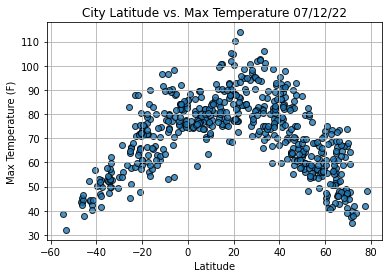

In [32]:
# import time module

import time

# build SCATTER PLOT for lat vs max temp

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incoprporate the other graph properties

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure

plt.savefig("weather_data/Fig1.png")

# show plot

plt.show()

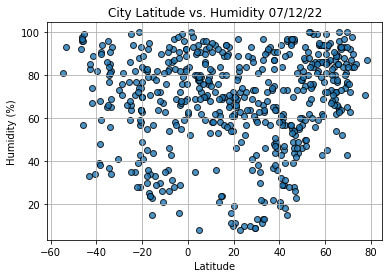

In [33]:
# build SCATTER PLOT for lat vs humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incoprporate the other graph properties

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure

plt.savefig("weather_data/Fig2.png")

# show plot

plt.show()

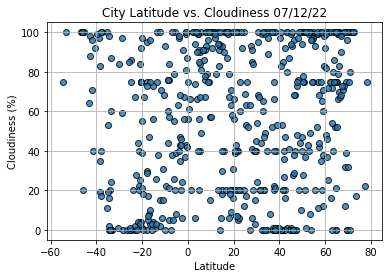

In [34]:
# build SCATTER PLOT for lat vs cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incoprporate the other graph properties

plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure

plt.savefig("weather_data/Fig3.png")

# show plot

plt.show()

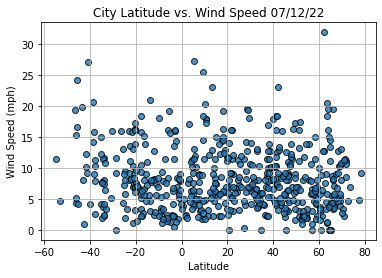

In [36]:
# build SCATTER PLOT for lat vs wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# incoprporate the other graph properties

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure

plt.savefig("weather_data/Fig4.png")

# show plot

plt.show()

In [38]:
# import linregress

from scipy.stats import linregress

# create a function to create perform linear regression on the weather data
# add plot a regression line and the equation with the data

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress (x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # create scatter plot and plot regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [39]:
# create dataframe within a dataframe

index13 = city_data_df.loc[13]
index13

City                        Disna
Country                        BY
Date          2022-07-12 17:24:02
Lat                        55.568
Lng                       28.1971
Max Temp                    56.75
Humidity                       86
Cloudiness                     93
Wind Speed                  13.94
Name: 13, dtype: object

In [40]:
# filter dataframe

city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
547     True
548     True
549     True
550     True
551     True
Name: Lat, Length: 552, dtype: bool

In [41]:
# return dataframe with the filtered criteria

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Shelburne,CA,2022-07-12 17:23:58,44.0787,-80.2041,72.75,90,87,16.02
4,Fortuna,US,2022-07-12 17:23:59,40.5982,-124.1573,59.92,94,100,4.79
5,Chokurdakh,RU,2022-07-12 17:24:00,70.6333,147.9167,47.88,92,100,11.01
6,Umm Lajj,SA,2022-07-12 17:24:00,25.0213,37.2685,90.27,52,69,7.23
11,Sao Filipe,CV,2022-07-12 17:24:02,14.8961,-24.4956,75.24,80,18,7.38


In [42]:
# create northern and southern hemisphere dataframes

northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

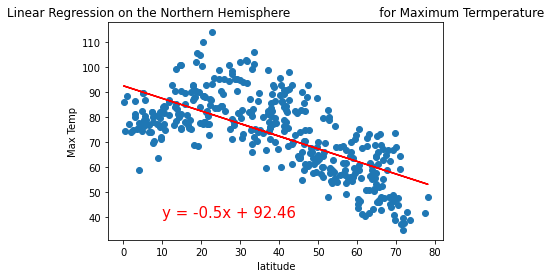

In [44]:
# linear regression on the northern hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Termperature', 'Max Temp',(10,40))

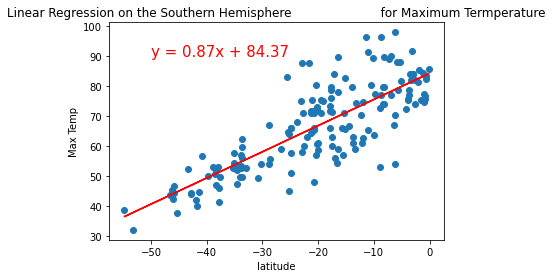

In [48]:
# linear regression on the southern hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Termperature', 'Max Temp',(-50,90))

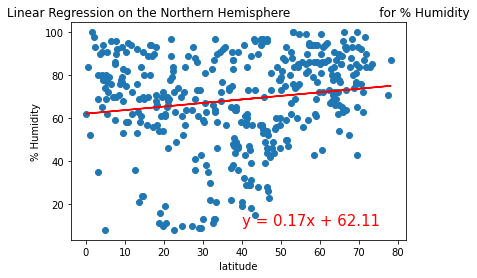

In [50]:
# linear regression on the northern hemisphere (humidity)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity',(40,10))

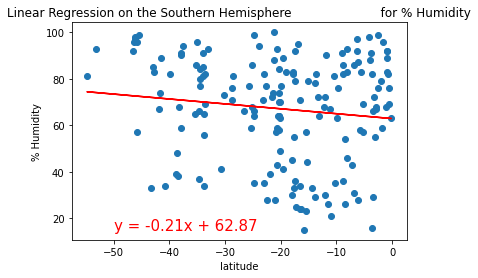

In [51]:
# linear regression on the southern hemisphere (humidity)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity',(-50,15))

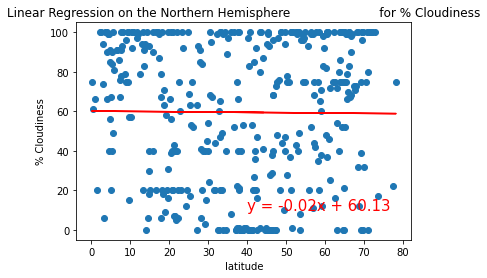

In [52]:
# linear regression on the northern hemisphere (cloudiness)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness',(40,10))

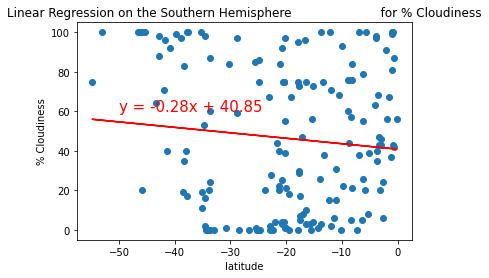

In [53]:
# linear regression on the southern hemisphere (cloudiness)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness',(-50,60))

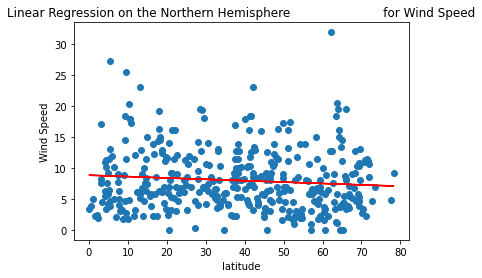

In [55]:
# linear regression on the northern hemisphere (wind speed)

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                       for Wind Speed', 'Wind Speed',(40,35))

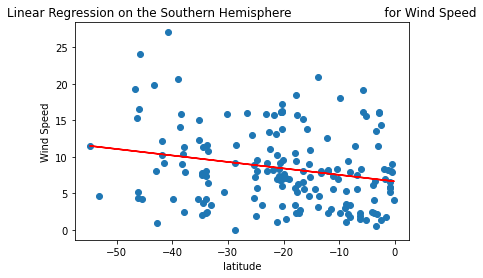

In [56]:
# linear regression on the southern hemisphere (wind speed)

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# call the function

plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                       for Wind Speed', 'Wind Speed',(-50,35))